## 2.2 

Tested SimpleNN on MNIST from torce 

In [1]:
import torch 
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

## Using SimpleNN & CrossEntropyLoss - Recap preivously used method

In [2]:
# Model definition
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Loss function definition
criterion = nn.CrossEntropyLoss()

# Optimizer definition
model = SimpleNN()
optimizer = optim.SGD(model.parameters(), lr=0.01)

Epoch 1/5, Average Loss: 0.9985867722996516
Epoch 2/5, Average Loss: 0.38181435259611113
Epoch 3/5, Average Loss: 0.32455930935103755
Epoch 4/5, Average Loss: 0.2921819523739408
Epoch 5/5, Average Loss: 0.2674302071896888


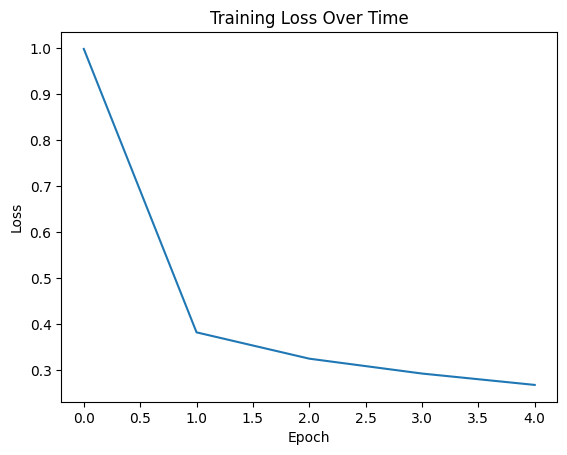

In [3]:
losses_over_time = []

# Prepare & Load data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]) # Define the Convertion of images to tensors & normalize

train_loader = torch.utils.data.DataLoader( # load data 
    datasets.MNIST('./data', train=True, download=True, transform=transform),
    batch_size=64, shuffle=True)

# Training loop
num_epochs = 5

for epoch in range(num_epochs):
    running_loss = 0.0 # Accumulates the loss per epoch

    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        # Accumulate the loss for visualization
        running_loss += loss.item()

    # Calculate average loss for the epoch - Add the loss 
    average_loss = running_loss / len(train_loader)

    # Append the average loss to the list
    losses_over_time.append(average_loss)

    # Print and visualize the loss - Plot the loss_over_time graph
    print(f'Epoch {epoch+1}/{num_epochs}, Average Loss: {average_loss}')

# Plot the loss_over_time graph
plt.plot(losses_over_time)
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

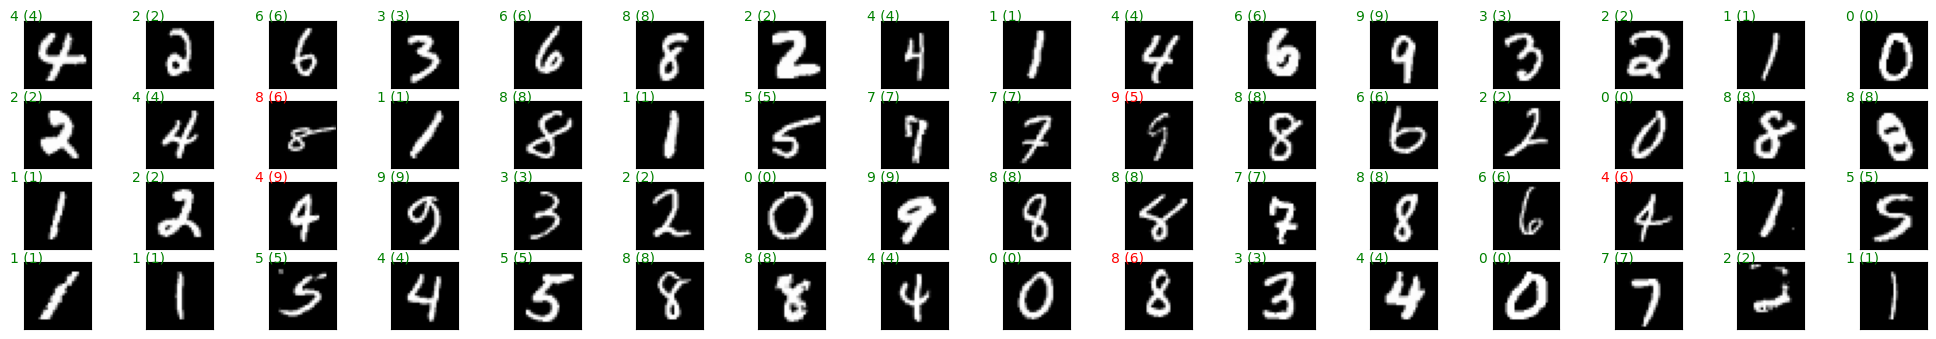

In [4]:
import numpy as np

# Load test data
testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=True)


# Test the model and visualize predictions
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get a batch of test data
dataiter = iter(testloader)
images, labels = next(dataiter)

model.to(torch.device('cpu')) # moving model to cpu

# Predict labels
model.eval() #set to evaluation mode
with torch.no_grad(): #dissable gradients (takes memory)
    outputs = model(images)
_, predicted = torch.max(outputs, 1)


# Show number and prediction side by side
fig = plt.figure(figsize=(25, 4)) # create a figure with a larger size
for idx in range(64): # loop over all images in the batch
    ax = fig.add_subplot(4, 16, idx+1, xticks=[], yticks=[]) # create a subplot for each image
    ax.imshow(images[idx].squeeze(), cmap='gray') # show the image in grayscale
    ax.text(0.5, -0.5, f'{labels[idx].item()} ({predicted[idx].item()})', ha='center', color='green' if labels[idx]==predicted[idx] else 'red') # add text annotation with the number and prediction, using green color for correct predictions and red color for wrong predictions
plt.show() # show the figure

## Using Convolutional Neural Network (CNN) & Negative Log Likelihood

### Trying out CNN , with new Cost and optimizer - Definition of Models

In [13]:
# Define a CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1) # Convolution Layer
        self.relu1 = nn.ReLU() # Introduce Non - Linearity 
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(self.relu1(self.conv1(x)))
        x = self.pool(self.relu2(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = self.relu3(self.fc1(x))
        x = self.fc2(x)
        return x

CNN_model = CNN()

# Optimizer and Loss function
optimizer = optim.Adam(CNN_model.parameters(), lr=0.001)  # Adam optimizer
# criterion = nn.NLLLoss()  # Negative Log Likelihood Loss
criterion = nn.CrossEntropyLoss()

# Part 2.3
Do write a lot of code snippets to make sure that things are correct.

Leave them here so that we could see that you have tried



In [14]:
# Here you will try out how to access directories

import os

test_directory = "MNIST Dataset JPG format\\MNIST - JPG - testing"
training_directory = "MNIST Dataset JPG format\\MNIST - JPG - training"

print(os.getcwd())

full_test_directory = os.path.join(os.getcwd(), test_directory)
print(full_test_directory)

full_train_directory = os.path.join(os.getcwd(), training_directory)
print(full_train_directory)

# Get all the names in the directory
# Explore how to use this glob library to get all image name
import glob

subfolders = [f.path for f in os.scandir(full_train_directory) if f.is_dir()]
image_paths = [] # Stores the image paths 

for subfolder in subfolders:
    image_pattern = os.path.join(subfolder, '*.jpg')  # Pattern Matching to get all the JPEG
    image_paths.extend(glob.glob(image_pattern)) # Glob to get all images 

# for i in range(10000):
#     print(image_paths[i])
# print(image_paths) # Alot of output }

C:\Users\jtann\OneDrive\Desktop\MLDA-DecProj23
C:\Users\jtann\OneDrive\Desktop\MLDA-DecProj23\MNIST Dataset JPG format\MNIST - JPG - testing
C:\Users\jtann\OneDrive\Desktop\MLDA-DecProj23\MNIST Dataset JPG format\MNIST - JPG - training


In [ ]:
from torch.utils.data import Dataset
from PIL import Image

CNN_model.to(torch.device('cpu'))

losses_over_time = []

class CustomDataset(Dataset): # Since I want to use DataLoader to load batches of images 
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths) # Number of data points 

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('L')  # Convert to grayscale
        label = int(os.path.basename(os.path.dirname(img_path)))  # Extract label from the folder name

        if self.transform:
            image = self.transform(image)

        return image, label

# Data loading and preprocessing
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
custom_dataset = CustomDataset(image_paths, transform)
batch_size = 64
custom_dataloader = DataLoader(custom_dataset, batch_size=batch_size, shuffle=True)

# Training loop
num_epochs = 30

for epoch in range(num_epochs):
    running_loss = 0.0
    for batch_idx, (data, target) in enumerate(custom_dataloader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

    average_loss = running_loss / len(custom_dataloader)

    losses_over_time.append(average_loss) # Append the average loss to the list
    
    print(f'Epoch {epoch+1}/{num_epochs}, Average Loss: {average_loss}')

plt.plot(losses_over_time)
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Epoch 1/30, Average Loss: 0.25496125349929843
Epoch 2/30, Average Loss: 0.2551856820962068
Epoch 3/30, Average Loss: 0.2550069791501138
Epoch 4/30, Average Loss: 0.2549992400779526
Epoch 5/30, Average Loss: 0.25502206139695416


In [ ]:
# Save the model to .pth
torch.save(CNN_model.state_dict(), 'simple_nn_model2.pth')

## Dataset and DataLoader
Follow this link https://pytorch.org/tutorials/beginner/basics/data_tutorial.html 
- Define the Dataset Class with 3 functions to get item
- Use the Dataloader in the training loop
- Iterate through the dataloader in the training loop